# Neural Network

In this Jupyter Notebook we provide two examples on how to use the Neural Network model for both tasks, classification and regression.

In [1]:
from layer import Layer
import loss
from model import Model
from optimizer import OptimizerAdam
from accuracy import Accuracy
import activation_function as af
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

### Classification

We will use the well-known "penguins" data set, from Seaborn

In [9]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We separate the data into feature (input) and label (output/prediction). We need to convert the data into numpy arrays.

In [10]:
df.dropna(inplace=True)
X = df.drop(['species', 'island', 'sex'], axis=1).to_numpy()
y = df['species'].map({'Adelie': 0, 'Chinstrap':1, 'Gentoo':2}).to_numpy()

In [11]:
print(f'X shape: {np.shape(X)}')
print(f'y shape: {np.shape(y)}')

X shape: (333, 4)
y shape: (333,)


It is important to known the shape of our input and output data, as it is necessary to create the Neural Network.

In [12]:
#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [19]:
#Initializing model
model = Model()

model.add_layer(Layer(4, 20))
model.add_layer(af.ActivationReLU())
model.add_layer(Layer(20,3))
model.add_layer(af.ActivationSoftmaxLossCategoricalCrossentropy())

We create a model with two layers of neurons and two activation functions. It is important to remark that the number of inputs of the first layer (4) must be the same number as the number of features of X. The same goes with the last layer: the number of outputs (3) must be the same as the number of labels (or classes) that we are trying to predict.

In [20]:
model.set(
    loss_function=loss.LossCategoricalCrossEntropy(),
    optimizer=OptimizerAdam(),
    accuracy=Accuracy('classification'))

In [21]:
#Training process
model.train(X_train, y_train, 2001)

epoch: 0, acc: 0.434, loss : 16.118
epoch: 100, acc: 0.265, loss : 2.027
epoch: 200, acc: 0.747, loss : 1.477
epoch: 300, acc: 0.743, loss : 1.237
epoch: 400, acc: 0.743, loss : 1.05
epoch: 500, acc: 0.751, loss : 0.896
epoch: 600, acc: 0.775, loss : 0.765
epoch: 700, acc: 0.823, loss : 0.652
epoch: 800, acc: 0.867, loss : 0.554
epoch: 900, acc: 0.88, loss : 0.469
epoch: 1000, acc: 0.9, loss : 0.394
epoch: 1100, acc: 0.92, loss : 0.329
epoch: 1200, acc: 0.932, loss : 0.273
epoch: 1300, acc: 0.936, loss : 0.225
epoch: 1400, acc: 0.948, loss : 0.184
epoch: 1500, acc: 0.952, loss : 0.15
epoch: 1600, acc: 0.952, loss : 0.121
epoch: 1700, acc: 0.96, loss : 0.097
epoch: 1800, acc: 0.964, loss : 0.078
epoch: 1900, acc: 0.964, loss : 0.062
epoch: 2000, acc: 0.968, loss : 0.049


In [23]:
#Validation
model.validate(X_test, y_test)

Validation acc: 0.976, loss : 0.189


In [25]:
#Prediction
x = [39.0, 19, 180.0, 3751.3]
pred = model.predict(np.array(x).reshape(1,4))
print(pred)

[0]


We predict the first class. In fact, the input is very similar to the first row of the dataset and it corresponds to the species "Adelie" (first class)

### Regression

Now, we will train the model to reproduce the values given by a function

In [84]:
# Create dataset
X = np.linspace(-1, 3, 500).reshape(500, 1)
y = np.exp(-(X**2 - 2*X)**2)

Even when we have only a single input, it is important to reshape the data in a shape that can be used by the model. np.linspace returns the data with shape (N,) but we need the data  as (N,1). 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [86]:
#Creating model
model = Model()

model.add_layer(Layer(1, 64))
model.add_layer(af.ActivationReLU())
model.add_layer(Layer(64, 64))
model.add_layer(af.ActivationReLU())
model.add_layer(Layer(64, 64))
model.add_layer(af.ActivationReLU())
model.add_layer(Layer(64, 1))
model.add_layer(af.ActivationLinear())

Now, we use a bigger Neural Network. Notice that we need to use an activation function compatible with a regression task

In [87]:
#We need to set a loss function compatible with regression
model.set(
    loss_function=loss.LossMeanSquaredError(),
    optimizer=OptimizerAdam(learning_rate = 0.01, decay = 0.01),
    accuracy=Accuracy('regression'))

MovieWriter ffmpeg unavailable; using Pillow instead.


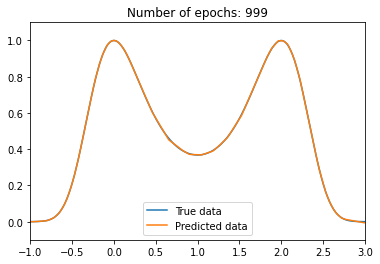

In [77]:
import matplotlib.pyplot as plt
model.training_animation(X, y, 1000, 50)

In [88]:
model.train(X_train, y_train, 5001)

epoch: 0, acc: 0.0, loss : 0.0
epoch: 100, acc: 0.107, loss : 0.0
epoch: 200, acc: 0.077, loss : 0.0
epoch: 300, acc: 0.016, loss : 0.0
epoch: 400, acc: 0.44, loss : 0.0
epoch: 500, acc: 0.44, loss : 0.0
epoch: 600, acc: 0.035, loss : 0.0
epoch: 700, acc: 0.589, loss : 0.0
epoch: 800, acc: 0.6, loss : 0.0
epoch: 900, acc: 0.661, loss : 0.0
epoch: 1000, acc: 0.16, loss : 0.0
epoch: 1100, acc: 0.584, loss : 0.0
epoch: 1200, acc: 0.677, loss : 0.0
epoch: 1300, acc: 0.712, loss : 0.0
epoch: 1400, acc: 0.443, loss : 0.0
epoch: 1500, acc: 0.704, loss : 0.0
epoch: 1600, acc: 0.101, loss : 0.0
epoch: 1700, acc: 0.269, loss : 0.0
epoch: 1800, acc: 0.675, loss : 0.0
epoch: 1900, acc: 0.16, loss : 0.0
epoch: 2000, acc: 0.573, loss : 0.0
epoch: 2100, acc: 0.659, loss : 0.0
epoch: 2200, acc: 0.123, loss : 0.0
epoch: 2300, acc: 0.715, loss : 0.0
epoch: 2400, acc: 0.645, loss : 0.0
epoch: 2500, acc: 0.685, loss : 0.0
epoch: 2600, acc: 0.168, loss : 0.0
epoch: 2700, acc: 0.328, loss : 0.0
epoch: 2800,

In [89]:
model.validate(X_test, y_test)

Validation acc: 0.76, loss : 0.0
